# RA-HMC mixing for unimodal, isotropic Gaussian
### Notebook
---

In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, MCMCChains, Plots, ProgressMeter

gr()
theme(:default)
default(fmt=:png, levels=7, lw=2, msw=0.5, la=0.5)
cls = [:firebrick1, :dodgerblue]
ProgressMeter.ijulia_behavior(:clear);

---

## d = 3

In [3]:
d = 3
model = Model(ξ=MvNormal(d, 1.0));

In [4]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=5e3, n_burn=1e3);
c1_3d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18
  HMC(0.5, 20, Any[]):  0.9715047492084653


Acceptance Ratio = 0.9704


In [5]:
s2, a2 = mcmc(RAHMC(ϵ=0.5, L=20, γ=0.05), model; n=5e3, n_burn=1e3);
c2_3d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
  RAHMC(0.5, 20, 0.05, Any[]):  0.9348441926345609


Acceptance Ratio = 0.9354


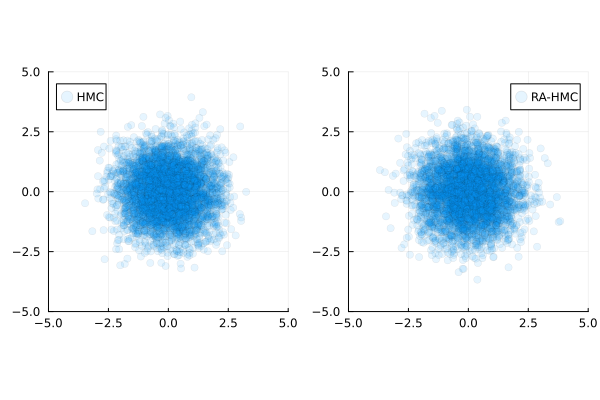

In [6]:
Ds = sample(1:d, 2, replace=false)
plot(
    scatter(s1[a1, Ds] |> m2t, ma=0.1, ratio=1, lim=(-5, 5), label="HMC"),
    scatter(s2[a2, Ds] |> m2t, ma=0.1, ratio=1, lim=(-5, 5), label="RA-HMC")
)

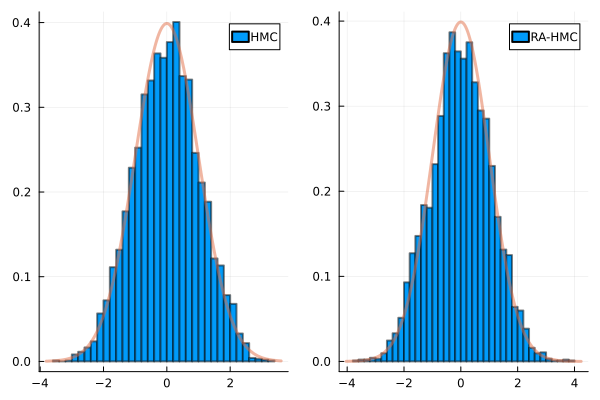

In [7]:
D = sample(1:d, 1)
plot(
    begin
        histogram(s1[a1, D] |> m2t, normalize=true, label="HMC")
        plot!(x -> pdf(Normal(0, 1), x), lw=3,label="")
    end,
    begin
        histogram(s2[a2, D] |> m2t, normalize=true, label="RA-HMC")
        plot!(x -> pdf(Normal(0, 1), x), lw=3,label="")
    end,
)

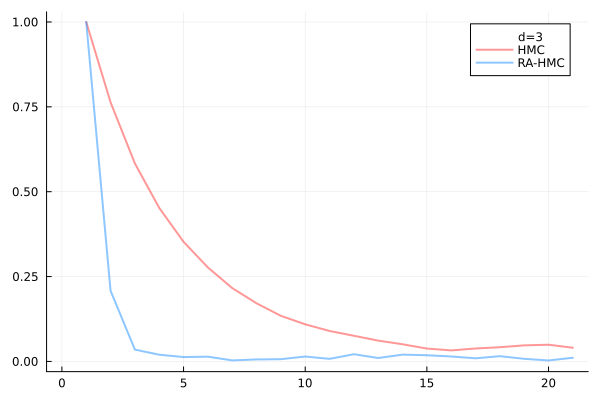

In [8]:
plt_3 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_3d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_3d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

---

## d = 10

In [9]:
d = 10
model = Model(ξ=MvNormal(d, 1.0));

In [10]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=5e3, n_burn=1e3);
c1_10d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
  HMC(0.5, 20, Any[]):  0.9495084152641227


Acceptance Ratio = 0.9506


In [11]:
s2, a2 = mcmc(RAHMC(ϵ=0.5, L=20, γ=0.05), model; n=5e3, n_burn=1e3);
c2_10d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
  RAHMC(0.5, 20, 0.05, Any[]):  0.8833527745375771


Acceptance Ratio = 0.8834


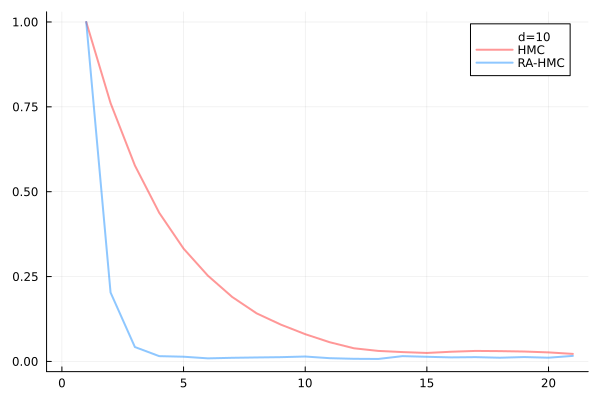

In [12]:
plt_10 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_10d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_10d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

---

## d = 50

In [13]:
d = 50
model = Model(ξ=MvNormal(d, 1.0));

In [14]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=5e3, n_burn=1e3);
c1_50d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
  HMC(0.5, 20, Any[]):  0.8796867188801867


Acceptance Ratio = 0.882


In [15]:
s2, a2 = mcmc(RAHMC(ϵ=0.5, L=20, γ=0.05), model; n=5e3, n_burn=1e3);
c2_50d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
  RAHMC(0.5, 20, 0.05, Any[]):  0.7238793534410931


Acceptance Ratio = 0.7255


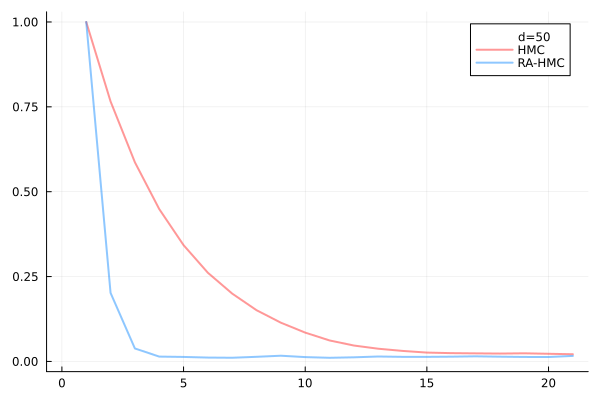

In [16]:
plt_50 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_50d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_50d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

---

## d = 100

In [17]:
d = 100
model = Model(ξ=MvNormal(d, 1.0));

In [18]:
s1, a1 = mcmc(HMC(ϵ=0.5, L=20), model; n=5e3, n_burn=1e3);
c1_100d = Chains(s1[a1, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08
  HMC(0.5, 20, Any[]):  0.8336943842692884


Acceptance Ratio = 0.8341


In [19]:
s2, a2 = mcmc(RAHMC(ϵ=0.5, L=20, γ=0.05), model; n=5e3, n_burn=1e3);
c2_100d = Chains(s2[a2, :]);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
  RAHMC(0.5, 20, 0.05, Any[]):  0.6142309615064157


Acceptance Ratio = 0.61


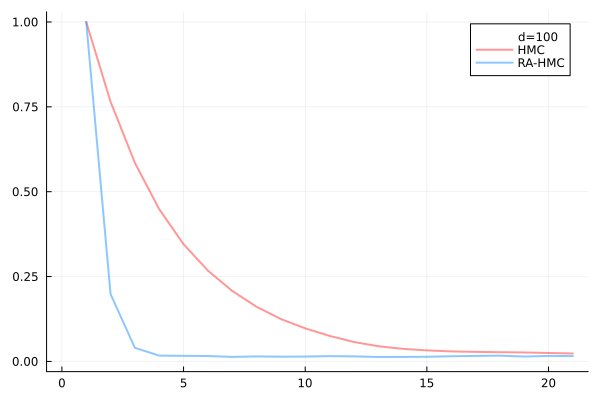

In [20]:
plt_100 = plot([0, 0], [0, 1], c=:white, lw=0, label="d=$d")
plot!(mean(abs.(autocor(c1_100d, lags=0:20)[:, :]), dims=1)', c=cls[1], label="HMC")
plot!(mean(abs.(autocor(c2_100d, lags=0:20)[:, :]), dims=1)', c=cls[2], label="RA-HMC")

---

### Comparisons

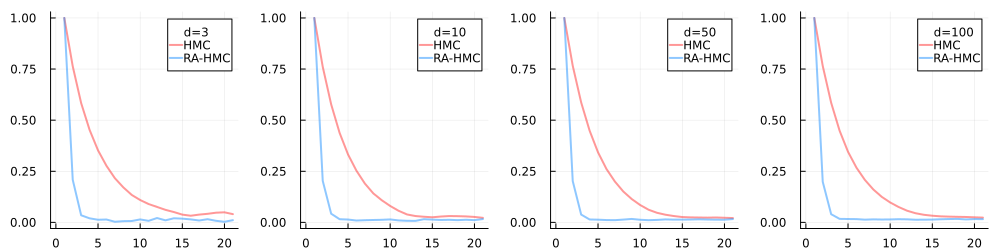

In [21]:
plt = plot(plt_3, plt_10, plt_50, plt_100, layout=(1, 4), size=(1000, 250))

---

### $2$-Wasserstein metric

In [22]:
w2(chain) = begin x = chain.value.data[:, :, 1]; W2(x, randn(size(x)...)) end
margin_of_error(d) = 5e3^(-1/d)

margin_of_error (generic function with 1 method)

In [23]:
(; w2=w2.([c1_3d, c2_3d]), me=margin_of_error(3))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:47


(w2 = [0.17372561072386689, 0.18945653955968622], me = 0.05848035476425733)

In [24]:
(; w2=w2.([c1_10d, c2_10d]), me=margin_of_error(10))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:49
Progress: 100%|█████████████████████████████████████████| Time: 0:00:42


(w2 = [3.0981980611423463, 3.232274610792802], me = 0.42668070064464836)

In [25]:
(; w2=w2.([c1_50d, c2_50d]), me=margin_of_error(50))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:47
Progress: 100%|█████████████████████████████████████████| Time: 0:00:33


(w2 = [53.40739691140335, 54.72500231918812], me = 0.8433747606554571)

In [26]:
(; w2=w2.([c1_100d, c2_100d]), me=margin_of_error(100))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:56
Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


(w2 = [133.09247687589735, 136.05223734125906], me = 0.9183543764013199)